#DATA Preprocessing and EDA


In [ ]:
#import packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import natural language packages
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#import data
df = pd.read_csv("https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv")
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
# verify the shape of dataframe
df.shape

(37249, 2)

In [ ]:
df['clean_comment'].iloc[1]

'buddhism has very much lot compatible with christianity especially considering that sin and suffering are almost the same thing suffering caused wanting things shouldn want going about getting things the wrong way christian this would mean wanting things that don coincide with god will and wanting things that coincide but without the aid jesus buddhism could also seen proof god all mighty will and omnipotence certainly christians are lucky have one such christ there side but what about everyone else well many christians believe god grace salvation and buddhism god way showing grace upon others would also help study the things jesus said and see how buddha has made similar claims such rich man getting into heaven joke basically advocating that should rid ourselves material possessions fact distinctly remembered jesus making someone cry because that someone asked what achieve salvation and jesus replied with live like buddhist very very roughly translated also point out that buddha rare

In [ ]:
# review one random row
df.sample()['clean_comment'].values

array(['hell don want hypocrite banning beef and porn don riot with government justifying the act find eligible party vote for nota '],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [ ]:
# review nulls
df.isnull().sum()

,0
clean_comment,100
category,0


In [ ]:
# identify the categories
df['category'].value_counts(normalize=True)* 100

,proportion
category,
1,42.497785
0,35.281484
-1,22.220731


In [ ]:
# Rows with missing clean_comment
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [ ]:
#finding which category these nulls are present in
df[df['clean_comment'].isna()]['category'].value_counts()

,count
category,
0,100


- all nulls are clearly visible to be present in the 0 meaning neutral comments categories

1  = Positive Comments
0  = Neutral Comments
-1 = Negative Comments

In [ ]:
# drop NAs
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(350)

In [ ]:
#inspect the duplicated rows
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [ ]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# verify duplicates again
df.duplicated().sum()

np.int64(0)

In [ ]:
# Identify rows where clean_comment is empty or has whitespace
df[(df['clean_comment'].str.strip() == "")]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [ ]:
# Remove rows with empty or whitespace-only clean_comment values
df = df[~(df['clean_comment'].str.strip() == "")]

In [ ]:
# convert the 'clean_comment' column to lowercase
df['clean_comment'] = df['clean_comment'].str.lower()

In [ ]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
# Identify text entries with leading or trailing whitespace
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [ ]:
# now remove leading and trailing whitespaces
df['clean_comment'] = df['clean_comment'].str.strip()

# verify if all trailing lines are removed
df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

- Identifying and Removing  URLS


In [ ]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()


,clean_comment,category


- Identifying and removing newline characters

In [ ]:
# Identify comments containing new line characters
comments_with_newline = df[df['clean_comment'].str.contains('\n')]

#Display the comments containing new line characters
comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [ ]:
# Remove new line character from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex = True)

# verify the transformation by checking for any remaining new lines
comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n')]
comments_with_newline_remaining

,clean_comment,category


#EDA

<Axes: xlabel='category', ylabel='count'>

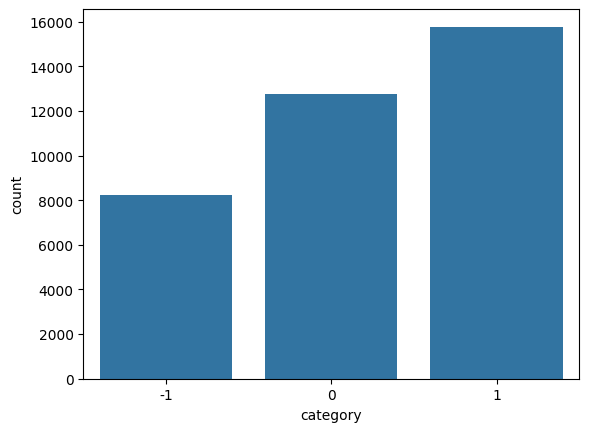

In [ ]:
sns.countplot(data=df, x = "category")

In [ ]:
# class weights in target
# frequency distribution of sentiments
df['category'].value_counts(normalize=True).mul(100).round(2)

,proportion
category,
1,42.86
0,34.71
-1,22.42


In [ ]:
# Feature Construction
df['word_count']  = df['clean_comment'].apply(lambda x: len(x.split()))

In [ ]:
df.head(5)

,clean_comment,category,word_count
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112


In [ ]:
df['word_count'].describe()

,word_count
count,36793.000000
mean,29.667464
std,56.790738
min,1.000000
25%,6.000000
50%,13.000000
75%,30.000000
max,1307.000000


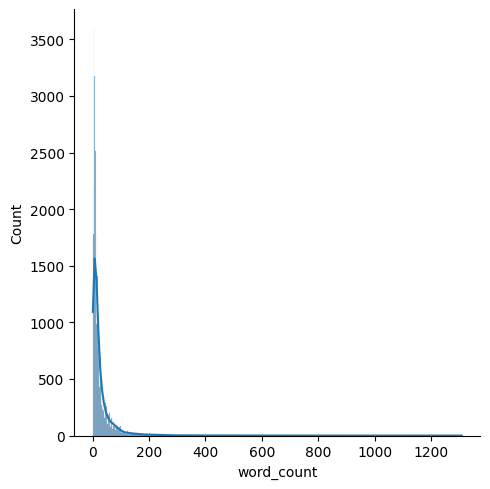

In [ ]:
sns.displot(df['word_count'], kde= True)

- The word count distribution is heavily right-skewed, with most comments being short and a small number of long outliers forming a long tail.

- X-axis	Number of words in a comment
- Y-axis	Number of comments

## Density Distribution of Categories by word_count

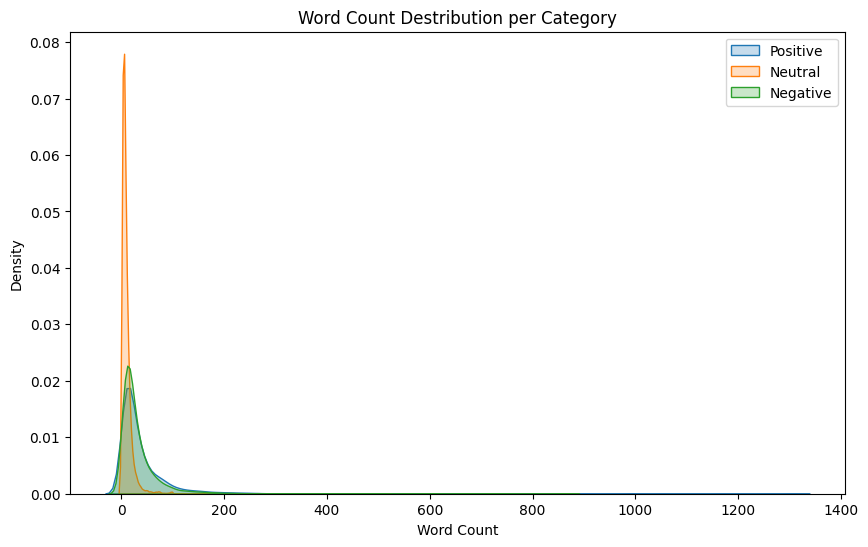

In [ ]:
plt.figure(figsize=(10,6))

# plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label = "Positive", fill= True)

# plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['word_count'], label = "Neutral", fill = True)

# plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['word_count'], label= "Negative", fill = True)

# Add Title and Label
plt.title("Word Count Destribution per Category")
plt.xlabel("Word Count")
plt.ylabel("Density")

plt.legend()
plt.show()

**Positive comments (category 1)**: These tend to have a wider spread in word count, indicating that longer comments are more common in positive sentiments.<br>
**Neutral comments (category 0)**: The distribution shows a relatively lower frequency and is more concentrated around shorter comments compared to positive or negative ones.<br>
**Negative comments (category -1)**: These comments have a distribution somewhat similar to positive comments but with a smaller proportion of longer comments.


<Axes: ylabel='word_count'>

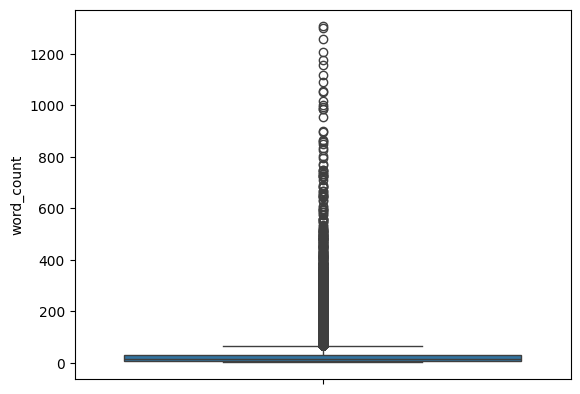

In [ ]:
# box plot
sns.boxplot(df['word_count'])

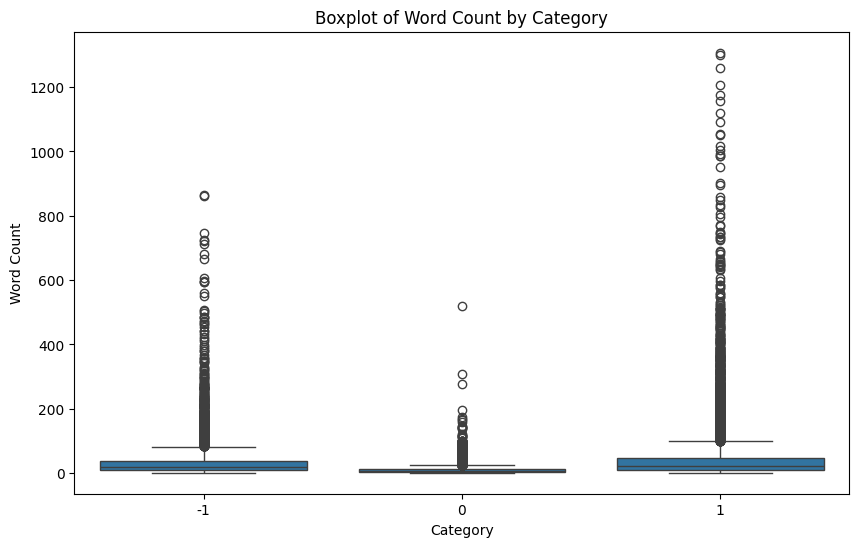

In [ ]:
# box plot for word_count by category
plt.figure(figsize=(10,6))
sns.boxplot(data= df, x= 'category', y ='word_count')
plt.title("Boxplot of Word Count by Category")
plt.xlabel("Category")
plt.ylabel("Word Count")
plt.show()

**Positive comments (category 1)**: The median word count is relatively high, and there are several outliers with longer comments, indicating that positive comments tend to be more verbose.<br>
**Neutral comments (category 0)**: The median word count is the lowest, with a tighter interquartile range (IQR), suggesting that neutral comments are generally shorter.<br>
**Negative comments (category -1)**: The word count distribution is similar to positive comments but with a slightly lower median and fewer extreme outliers.

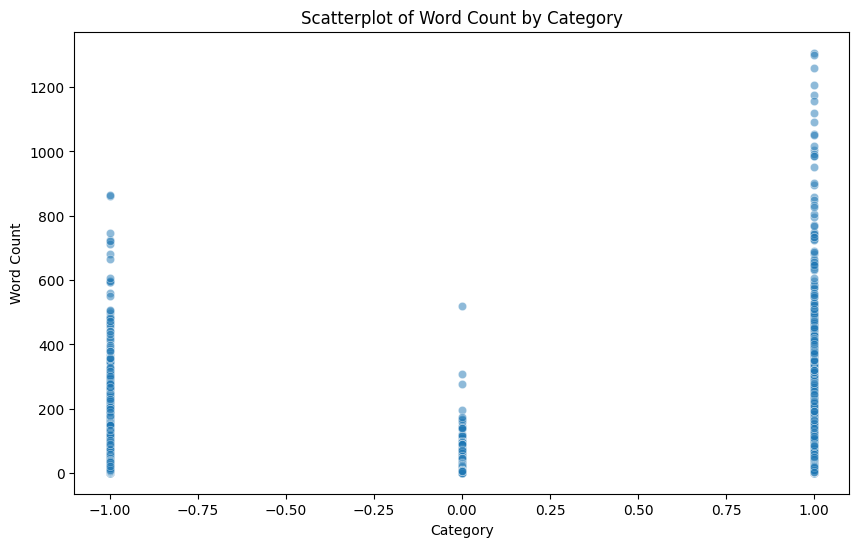

In [ ]:
from pandas.core.indexes import category
# scatter plot for the category and word count
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x= 'category', y= 'word_count', alpha=0.5)
plt.title("Scatterplot of Word Count by Category")
plt.xlabel("Category")
plt.ylabel("Word Count")
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

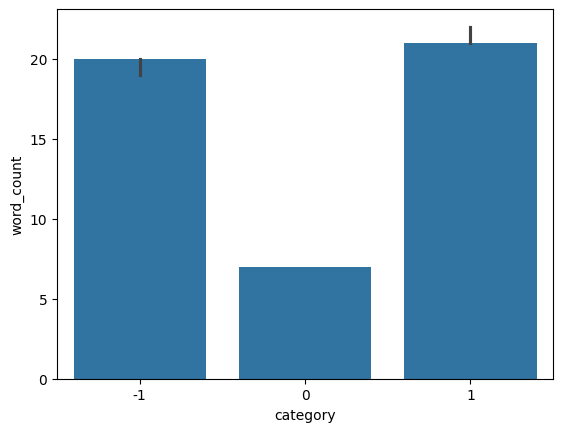

In [ ]:
# median word counts among sentiments
sns.barplot(data = df, x='category', y= 'word_count', estimator='median')

In [ ]:
# define the list of English Stopwords
stop_words = set(stopwords.words('english'))

# create a new column 'num_stop_words' by counting the number if stopwords in each comment
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]) )

In [ ]:
df.head()

,clean_comment,category,word_count,num_stop_words
0,family mormon have never tried explain them th...,1,39,13
1,buddhism has very much lot compatible with chr...,1,196,59
2,seriously don say thing first all they won get...,-1,86,40
3,what you have learned yours and only yours wha...,0,29,15
4,for your own benefit you may want read living ...,1,112,45


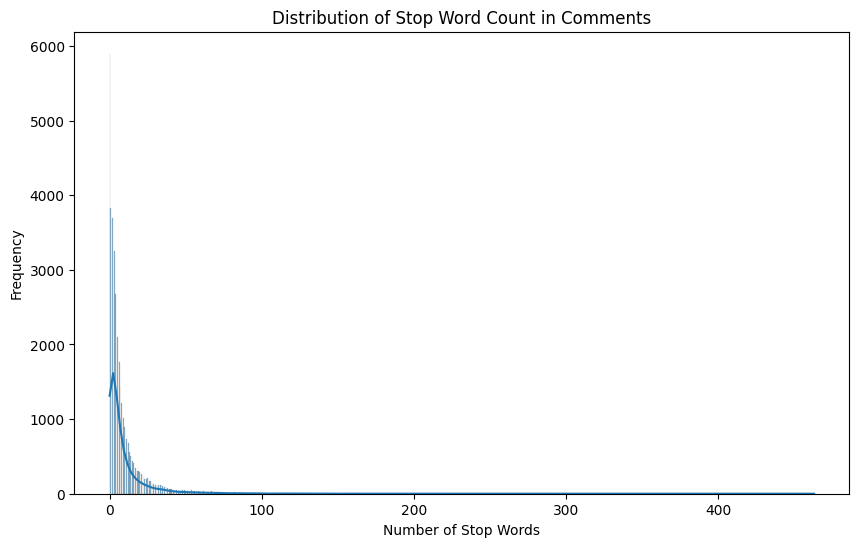

In [ ]:
# Create a distribution plot of the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

##Density Distribution of Categories by num_stop_words

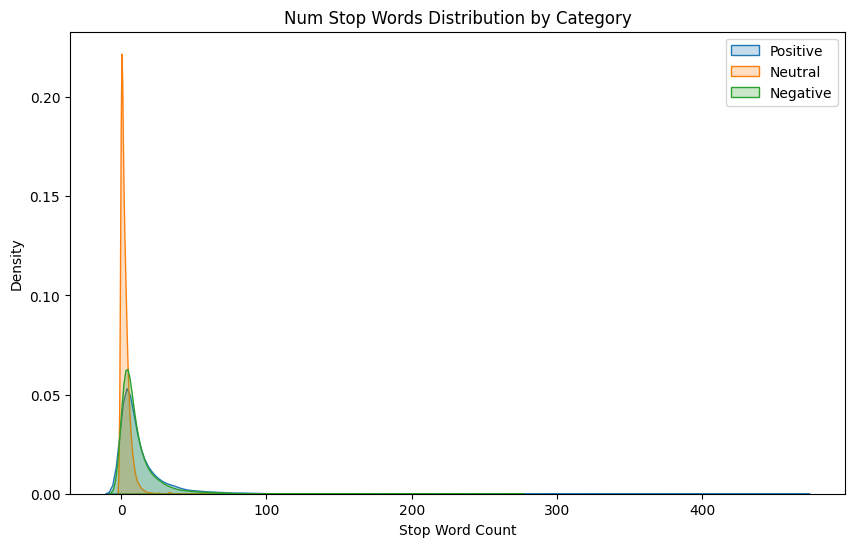

In [ ]:
plt.figure(figsize=(10,6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label = "Positive", fill = True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label = "Neutral", fill = True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label = "Negative", fill = True)

plt.title('Num Stop Words Distribution by Category')
plt.xlabel('Stop Word Count')
plt.ylabel('Density')

plt.legend()
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

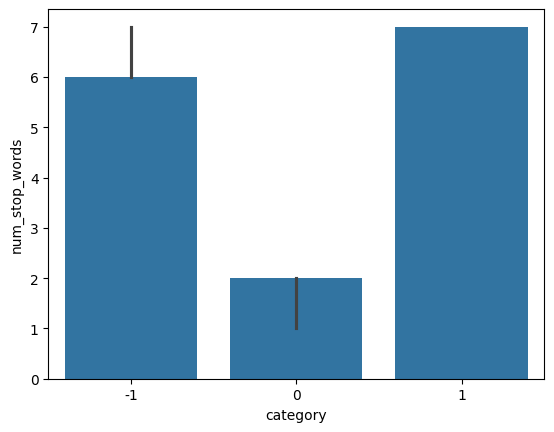

In [ ]:
# barplot with stop word count among sentiments
sns.barplot(data = df, x = 'category', y= 'num_stop_words', estimator='median')

In [ ]:
# Create a frequency distribution of stop words in the 'clean comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a data frame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns = ['stop_word', 'count'])
top_25_df.head()

,stop_word,count
0,the,57669
1,and,28950
2,that,15372
3,this,13463
4,for,12976


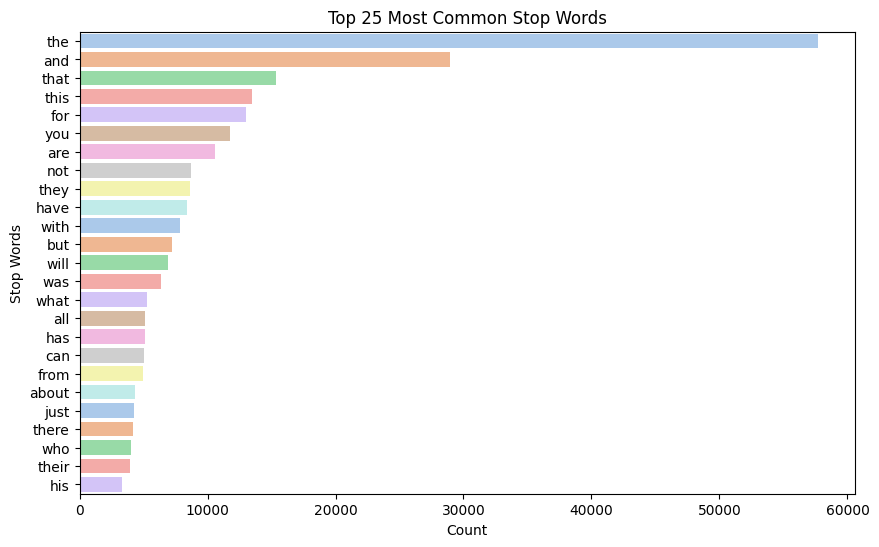

In [ ]:
# Create a bar plot with the most common 25 stop words
plt.figure(figsize=(10,6))
sns.barplot(data=top_25_df, x = 'count', y = 'stop_word', palette='pastel', hue= 'stop_word')
plt.title("Top 25 Most Common Stop Words")
plt.xlabel("Count")
plt.ylabel("Stop Words")
plt.show()

In [ ]:
# create new column num_chars
df['num_chars'] = df['clean_comment'].apply(len)

df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [ ]:
df['num_chars'].describe()

,num_chars
count,36793.000000
mean,181.852798
std,359.702163
min,1.000000
25%,38.000000
50%,80.000000
75%,184.000000
max,8664.000000


In [ ]:
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['clean_comment'])

# Count the Frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a Dataframe for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns= ['character', 'frequency']).sort_values(by='frequency', ascending=False)

In [ ]:
char_frequency_df['character'].values

array([' ', 'e', 't', ..., '段', '她', '谁'], dtype=object)

In [ ]:
char_frequency_df.tail(50)

,character,frequency
1286,货,1
1287,语,1
1312,耐,1
1313,精,1
342,━,1
345,⊂,1
346,゜,1
347,ｊ,1
1289,显,1
1291,鞋,1


In [ ]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['clean_comment'].apply(lambda x : sum([1 for char in x if char in '.,!?;:"\'()[]{}-']))

df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
11628,that has one just because you want one just be...,0,62,38,320,0
22979,said sir there are already cells the party let...,-1,38,13,222,0
24209,you are stupid you rear snakes and expect them...,-1,12,6,63,0
31283,classic pappu,1,2,0,13,0
14134,let see can get that anthem done,0,7,2,32,0


In [ ]:
df['num_punctuation_chars'].describe()

,num_punctuation_chars
count,36793.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

# Convert the bigrams into data frame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns = ['bigram', 'count'])
top_25_bigrams_df.head()

,bigram,count
0,free encyclopedia,623
1,encyclopedia team,598
2,good good,409
3,prime minister,389
4,best overall,375


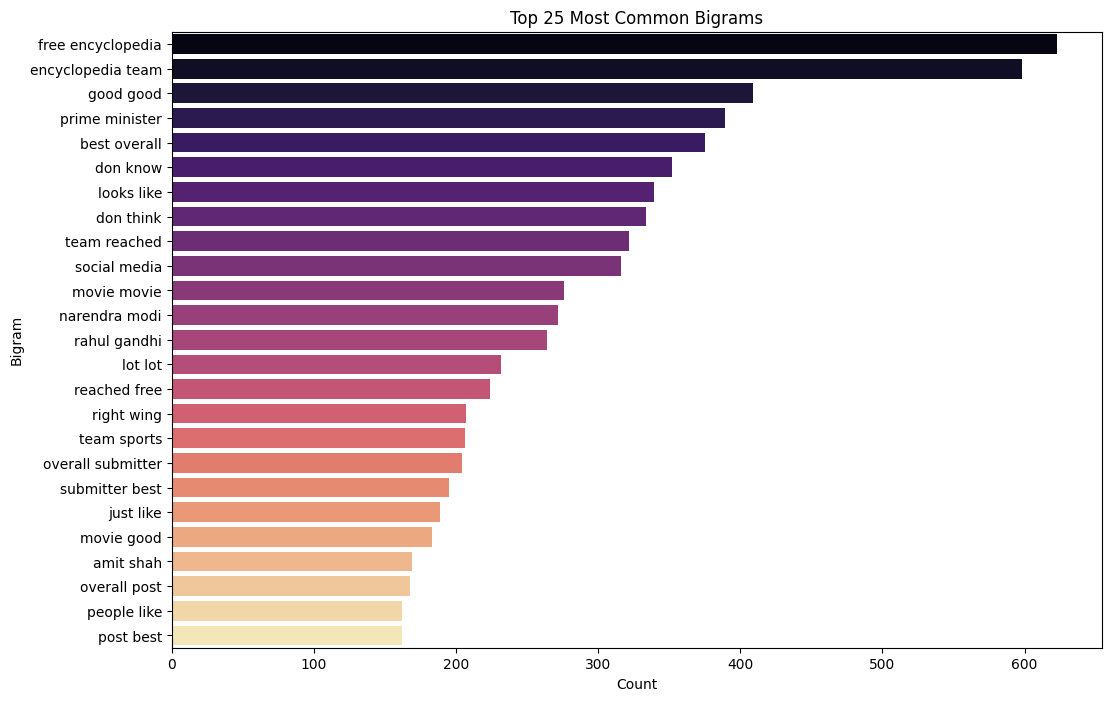

In [ ]:
# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma', hue= 'bigram')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

In [ ]:
# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)


# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])
top_25_trigrams_df.head(5)

,trigram,count
0,free encyclopedia team,598
1,good good good,385
2,encyclopedia team reached,316
3,movie movie movie,266
4,team reached free,224


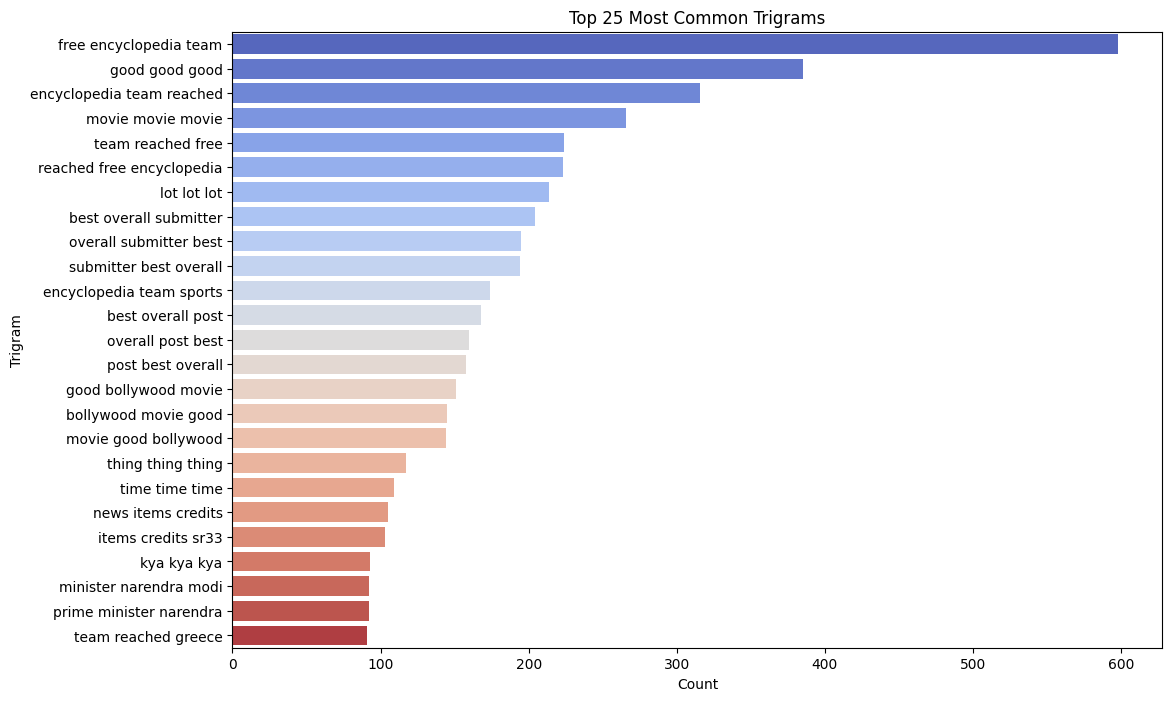

In [ ]:
# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm', hue = 'trigram' )
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [ ]:
# Remove the  non English Characters from the clean_comment column
# Keeping only standard English letters, digits and common punctuations

import re
df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [ ]:
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a Data Frame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns = ['character', 'frequency'])
char_frequency_df.head(5)

,character,frequency
0,f,78866
1,a,481134
2,m,155561
3,i,401388
4,l,250104


In [ ]:
from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column , retaining essential ones
df['clean_comment'] = df['clean_comment'].apply(lambda x : ' '. join([word for word in x.split() if word.lower() not in stop_words]))

In [ ]:
df.head(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
df['clean_comment'] = df['clean_comment'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


## Creating Word Cloud

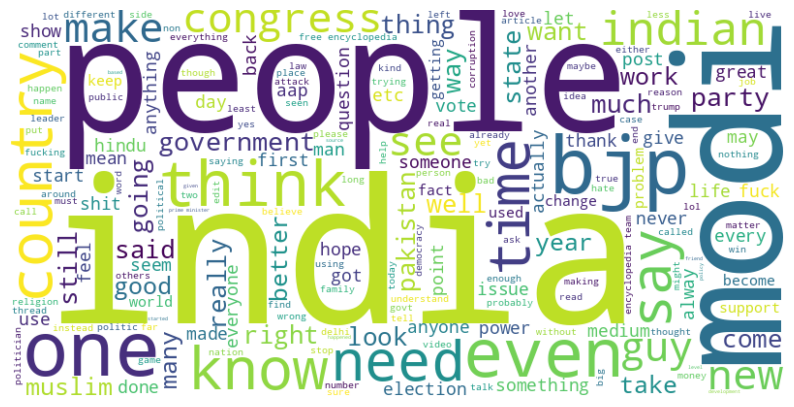

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def plot_word_cloud(text):
  word_cloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
  plt.figure(figsize=(10,6))
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

# pass the clean_comment column text
plot_word_cloud(df['clean_comment'])

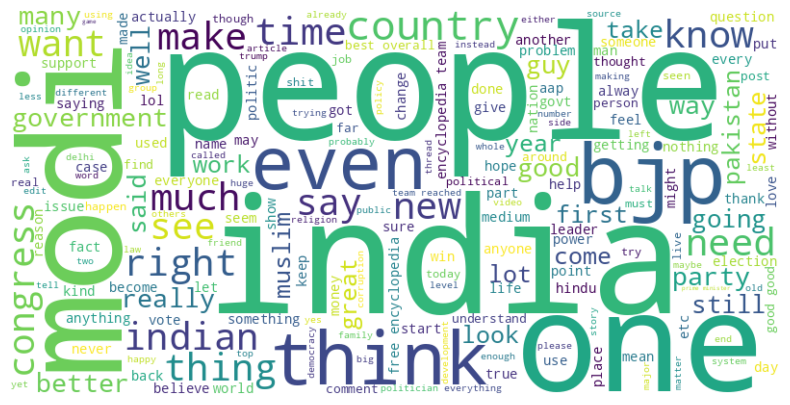

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 1]['clean_comment'])

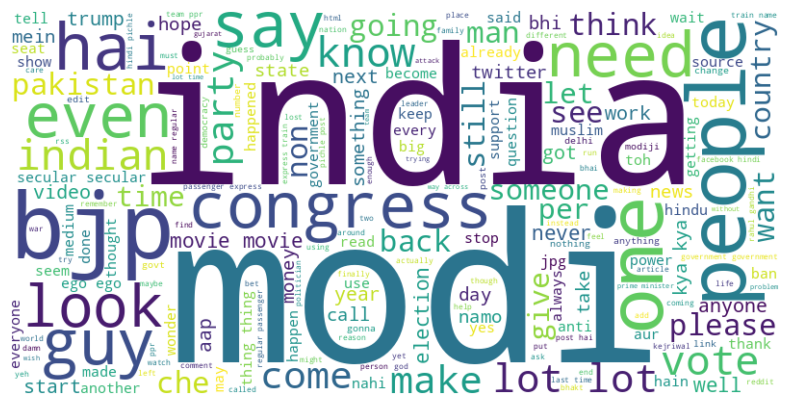

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 0]['clean_comment'])

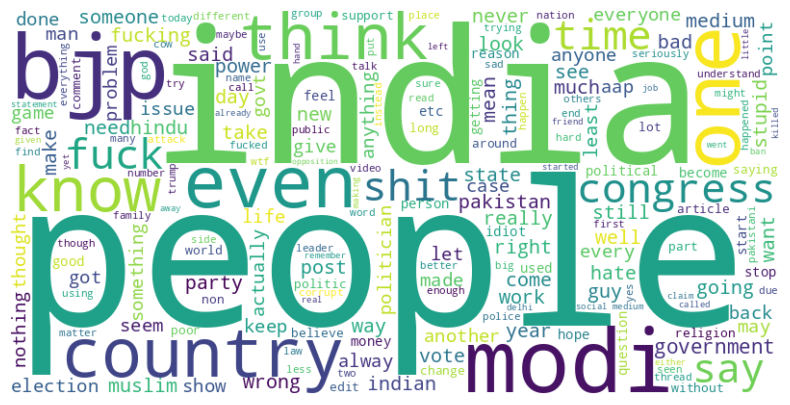

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == -1]['clean_comment'])

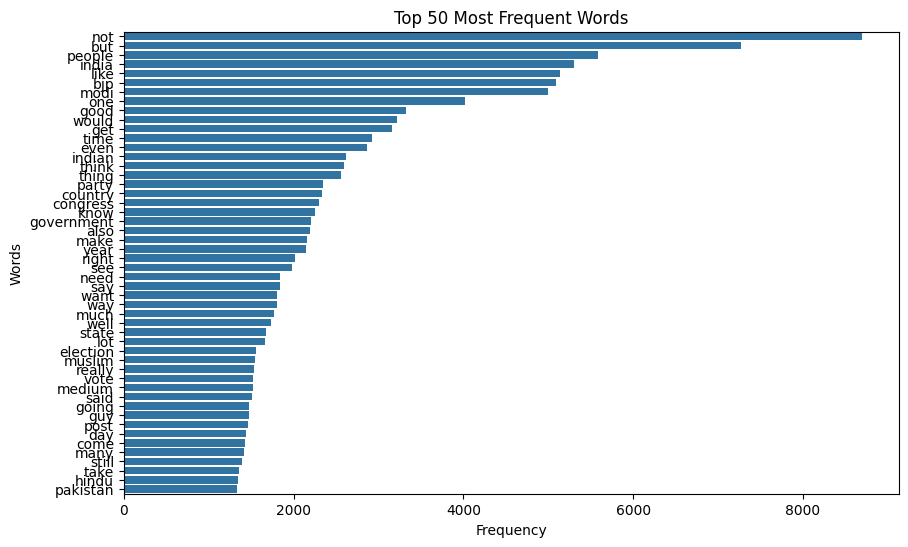

In [ ]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset """
    # Flatten all words on the content column
    words = ' '.join(df['clean_comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top 20
    plt.figure(figsize=(10,6))
    sns.barplot(x=list(counts), y = list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=50)


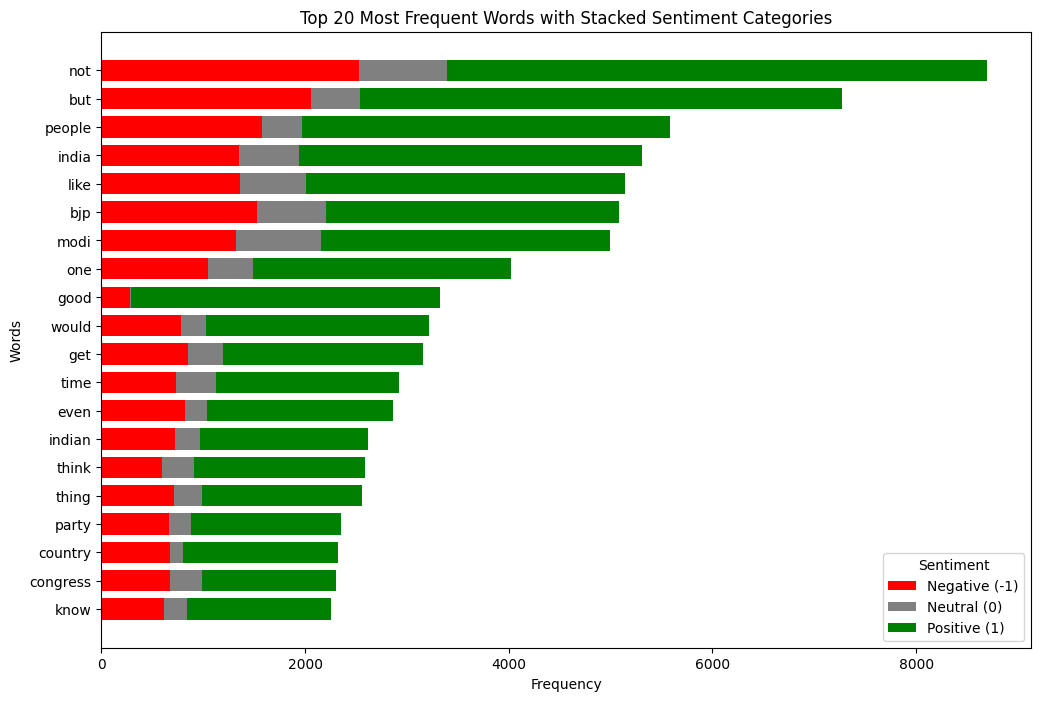

In [ ]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']  # Assuming 'category' column exists for -1, 0, 1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_category(df, n=20)
